In [228]:
import numpy as np
import pandas as pd

In [229]:
pd.set_option('display.max_columns',None)
pd.set_option('display.min_rows',0)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth', None)

## Read in DFs

In [230]:
df = pd.read_csv(r'C:\Users\TRW\Documents\NYCDSA\Selenium\Web_Scraping_Project\main_amazon.csv')
df.sample(5)

country                                              title  \
949   United Kingdom  Radiant Powerful You: Ditch the Battle with Yo...   
1293   United States  Praying with Jane: 31 Days through the Prayers...   
1354   United States                   Turning My Mourning Into Dancing   
373            India  Chucking It All: How Downshifting to a Windswe...   
444            India           Back Porch Mornings: My Journey to Peace   

      rating   price  sponsored            form  
949      5.0   £0.00          0  Kindle Edition  
1293     4.7  $14.99          0       Hardcover  
1354     5.0   $2.99          0          Kindle  
373      4.0     NaN          0       Paperback  
444      5.0     NaN          0       Paperback

In [265]:
df.shape

(1457, 6)

## Remove Currency Symbols 

In [231]:
df['price'] = df['price'].str.replace('$', '').str.replace('CDN', '').str.replace('₹', '') \
                .str.replace('S', '').str.replace('AED', '').str.replace('£','').str.replace(',','')
df.sample(5)

country                                              title  \
171                 Canada              Lessons: My Path to a Meaningful Life   
869   United Arab Emirates  My Gratitude Journal For Kids: Practice your G...   
661                  India  How to Improve Your Sex Life: An uncensored gu...   
1362         United States  MY LOSS NOT YOURS: The love and support that I...   
358                  India  The Running Soul: My Journey From Darkness To ...   

      rating  price  sponsored            form  
171      4.7  12.99          0  Kindle Edition  
869      NaN  32.10          0       Paperback  
661      NaN    305          0  Kindle Edition  
1362     5.0   6.99          0          Kindle  
358      4.6    NaN          0       Paperback

## Convert Price Column To Floats

In [232]:
df['price'] = df['price'].astype(float)

## Convert All Currency to US Dollar

In [233]:
conv = pd.DataFrame({'country':['Australia','Canada','India','Singapore', \
                                'United Arab Emirates','United Kingdom','United States'],
                      'rate':[0.70931,0.74525,0.01338,0.72225,0.27221,1.27618,1]})

In [234]:
conv

country     rate
0             Australia  0.70931
1                Canada  0.74525
2                 India  0.01338
3             Singapore  0.72225
4  United Arab Emirates  0.27221
5        United Kingdom  1.27618
6         United States  1.00000

In [235]:
df = pd.merge(df, conv, how='left', on='country')

In [236]:
df['price'] = df['price']*df['rate']

In [237]:
df = df.drop(['rate'],axis=1)

## Round currencies to 2nd decimal place

In [238]:
df['price'] = df['price'].apply(lambda f: round(f,2))
df['price']

0         27.73
1         10.63
2          8.50
3          0.00
4         12.05
5           NaN
6         18.82
7         16.92
8         17.00
9         10.20
10        18.14
11        17.00
12         0.00
13         8.50
14        18.04
15         4.67
16          NaN
17          NaN
18         0.00
19         8.50
20        10.63
21        12.05
22        23.53
23         4.08
24        20.04
25        17.01
26         3.54
27         9.53
28        16.18
29        18.09
30         9.92
31        25.04
32         6.35
33         0.00
34         6.47
35         8.69
36         3.18
37         7.09
38        13.90
39          NaN
40         6.06
41         9.21
42         8.50
43         5.84
44         2.12
45         6.38
46        18.71
47         7.74
48        11.00
49         6.38
50        10.51
51        10.62
52        19.27
53        10.63
54         9.21
55         0.00
56        21.49
57         7.93
58         7.93
59         0.00
60         7.92
61        12.76
62      

## Averages

In [239]:
df.groupby('country').mean().sort_values('rating', ascending=False)

rating      price  sponsored
country                                             
Canada                4.633333  10.023667   0.120879
Singapore             4.582222  15.208986   0.000000
United States         4.537771   8.930272   0.196850
Australia             4.510256   8.468792   0.000000
United Kingdom        4.445082  21.196967   0.000000
India                 4.369832   3.094603   0.099071
United Arab Emirates       NaN  10.018500   0.000000

## Counts of forms per country

In [240]:
df.groupby(['country', 'sponsored']).count()

title  rating  price  form
country              sponsored                            
Australia            0            160      78    149   160
Canada               0            160      78    158   159
                     1             22      21     22    22
India                0            291     147    220   291
                     1             32      32     32    32
Singapore            0             91      45     69    90
United Arab Emirates 0            160       0    160   158
United Kingdom       0            160     122    122   114
United States        0            306     264    292   296
                     1             75      59     75    75

In [241]:
df.groupby(['country', 'form']).count()

title  rating  price  sponsored
country              form                                                  
Australia            Audible Audiobook          1       0      1          1
                     Diary                      1       1      1          1
                     Hardcover                  5       4      4          5
                     Kindle                    67      51     67         67
                     Kindle Edition            13       2     13         13
                     Paperback                 71      20     63         71
                     Prime Video                2       0      0          2
Canada               Audible Audiobook          1       0      1          1
                     Diary                      1       1      1          1
                     Flexibound                 1       1      1          1
                     Hardcover                 16      14     16         16
                     Kindle Edition            35      27     35         35
                     Paperback                125      55    125        125
                     Prime Video                2       0      0          2
India                Diary                      1       1      0          1
                     Hardcover                 15      11      9         15
                     Kindle Edition           184      84    184        184
                     Mass Market Paperback      2       2      0          2
                     Paperback                121      81     59        121
Singapore            Audio CD                   1       1      1          1
                     Hardcover                 12       7      8         12
                     Imitation Leather          1       1      0          1
                     MP3 CD                     6       6      4          6
                     Mass Market Paperback      1       1      1          1
                     Paperback                 68      27     54         68
                     Spiral-bound               1       1      0          1
United Arab Emirates Hardcover                  5       0      5          5
                     Paperback                153       0    153        153
United Kingdom       App                        1       1      0          1
                     Audible Audiobooks         1       0      1          1
                     Hardcover                  4       2      2          4
                     Kindle & comiXology        1       1      1          1
                     Kindle Edition           102      97    102        102
                     MP3 Download               1       0      0          1
                     Paperback                  3       3      1          3
                     Prime Video                1       0      1          1
United States        App                        4       4      1          4
                     Audible Audiobook         24      23     24         24
                     Board book                 1       1      1          1
                     Hardcover                 31      27     29         31
                     Imitation Leather          1       0      1          1
                     Kindle                    84      69     84         84
                     Kindle & comiXology        1       1      1          1
                     Kindle Edition            64      46     64         64
                     MP3 Music                  4       3      0          4
                     Office Product             1       1      1          1
                     Paperback                150     135    147        150
                     Prime Video                3       1      1          3
                     Spiral-bound               2       2      2          2
                     VHS Tape                   1       1      1          1

## Highest rated books/products from each country (Sort)

In [242]:
df.sort_values("rating", ascending = False, inplace = False)

country                                              title  \
1280         United States  Goodbye Self-Critical, Hello Self-Thrilled!: A...   
1177         United States  It’s How You Play The Game: A Workbook for Cre...   
598                  India  52 More Weeks of Gratitude: Thank Your Way to ...   
1059        United Kingdom  Improve Eyesight: 5 Ways I Used to Correct My ...   
1057        United Kingdom  The Neuroscience of Mindfulness: The Astonishi...   
199                 Canada  Fit Cities: My Quest to Improve the World's He...   
200                 Canada  Radiant Powerful You: Ditch the Battle with Yo...   
201                 Canada                               Life: A Field Manual   
1433         United States   Is Your Credit On Life Support?: Call The Doctor   
1189         United States  Feed Your Calm: Anti-Anxiety Anti-Stress Diet ...   
209                 Canada  My Horoscope, Planner and Journal for 2019: A ...   
1423         United States  THE SECRETS TO A MAGICAL LIFE: Learn 104 Strat...   
1333         United States  Who Knew: Lessons From My First 40 Years: Self...   
1379         United States  Politically Divided: A How-To Healing Workbook...   
583                  India  FREEDOM to Be Me: Tools for Happiness, Fulfilm...   
1048        United Kingdom  Successful Time Management: How to be Organize...   
1182         United States  Make a Smooth Transition after the Military: C...   
222                 Canada  My Amazing Planner: 5 Minute Method To Make Yo...   
574                  India  Champion of Change: The 7 Instrumental Laws of...   
997         United Kingdom  Sex Up Your Life: The Mind-Blowing Path to Tru...   
193                 Canada  This Is My Meat Smoking Journal: The Smoker's ...   
607                  India  Becoming Who You're Meant To Be: Because There...   
630                  India  The Neuroscience of Mindfulness: The Astonishi...   
1116         United States                   I've Decided I Want My Seat Back   
642                  India  Life's Six Buckets: The Fulfillment Source Cod...   
1205         United States  Make a Smooth Transition after the Military: C...   
639                  India  Getting Naked With My Clothes On: Understandin...   
1071        United Kingdom                               Life: A Field Manual   
1328         United States  Unbeatable Mind: Develop Mental Toughness And ...   
1200         United States          My Magical Gifts (The Magic of Me Series)   
1198         United States  It’s How You Play The Game: A Workbook for Cre...   
616                  India    My Success Journal: My Path to a Life by Design   
1195         United States  Help! My Teen Has Diabetes: The Resource for F...   
628                  India             How To Be The Man She Wants To Respect   
627                  India            A Man's Integrity is a Woman's Security   
458                  India          Share My Insanity: It Improves Everything   
1194         United States  If You Say So: My Story and How I Changed It t...   
1375         United States  Next Level You: How I transformed my life with...   
1299         United States  Beyond Me: Dissecting Ego To Find The Innate L...   
1179         United States          My Magical Gifts (The Magic of Me Series)   
1175         United States  If You Say So: My Story and How I Changed It t...   
648                  India  Habits: How to Implement Essential Habits to I...   
234                 Canada  Don't Take Yes for an Answer: Using Authority,...   
1009        United Kingdom              My Guide to Manchester Second Edition   
497                  India  Morning Habits You Need To Know: How to Build ...   
529                  India         Multiple Sclerosis for the Non-Neurologist   
526                  India     My Sleep Diary - Reflections Within and Beyond   
520                  India  Life Lessons from My Memoir: Presentation of E...   
517                  India  YES! TO Love: The Ulti

In [262]:
pd.set_option('display.max_colwidth', None)
df[["title"]][df["rating"] == 5].sort_values("title", ascending = True, inplace = False).drop_duplicates(subset=None, keep='first', inplace=False)

title
665                             "My-Shield" Against Parkinson's Disease: How "My-Shield" Therapy Helped Me to Fight Back Against Parkinson's and Improve My Quality of Life!
670                                                                                                                              24 Qualities That Helped Me Improve My Life
598                                                                                   52 More Weeks of Gratitude: Thank Your Way to Happiness (52 Weeks of Gratitude Book 2)
435                                                                                    65 Life's Lessons: The Most Important Lesson from Each Year of My Life (Plus Momisms)
627                                                                                                                                  A Man's Integrity is a Woman's Security
1110                                                                                                 ADHD: You've Got My Attention: Strategies for Meeting Life's Challenges
444                                                                                                                                 Back Porch Mornings: My Journey to Peace
240                                                                              Be Healthy Every Day: A Weekly Planner--With Recipe Ideas, Healthy Hacks, and 300+ Stickers
607                                                                                                            Becoming Who You're Meant To Be: Because There's Only One You
1340                                                                                              Behind in the Count: My Journey from Juvenile Delinquent to Baseball Agent
1299                                                                    Beyond Me: Dissecting Ego To Find The Innate Love At Humanity's Core/ A New Psychology As Philosophy
1170                                                                       COURAGE in the FACE of CRUELTY: MY TWENTY-EIGHT YEAR JOURNEY THROUGH THE CALIFORNIA PRISON SYSTEM
662                                                                                           Cada Dia Con Amor y Respeto: Devociones Buenas Para El, Encantadoras Para Ella
574                                              Champion of Change: The 7 Instrumental Laws of Change That Will Jumpstart and Solidify Your Success, Your Growth, Your Life
1171                                                                                                     Comfortably Uncomfortable: The Road to Happiness Isn't Always Paved
1258                                           Credit Repair Secrets: How to Improve Your Credit Score by 100 Points In 30 Days: Credit Secrets, Improve your financial Life
1428                                                                                                             Decoding Karma: Transform everyday life with ancient wisdom
234                                                                             Don't Take Yes for an Answer: Using Authority, Warmth, and Energy to Get Exceptional Results
718                                                                                                   Everyday Witchcraft: Magic and Spells to Enchant a Modern Woman's Life
583                                                                                                              FREEDOM to Be Me: Tools for Happiness, Fulfilment and Peace
1086                                                                                    Favor with Kings: God's Purpose, Your Passion, and the Process of Doing Great Things
1189                                                                                 Feed Your Calm: Anti-Anxiety Anti-Stress Diet and Supplement Tips for Stress Resilience
199                                                                                         Fit Cities: My Quest to Improve the World's Health and Wellness--Including Yours
724            

In [264]:
df[["title"]][df["rating"] == 5].sort_values("title", ascending = True, inplace = False).drop_duplicates(subset=None, keep='first', inplace=False).count()

title    121
dtype: int64

## Display Duplicate Books

In [15]:
df[df.title.duplicated(keep=False)]

country                                              title  \
0                Australia  The Neighborhood Project: Using Evolution to I...   
1                Australia  Tell Me What You Want: The Science of Sexual D...   
2                Australia  Sex Up Your Life: The Mind-Blowing Path to Tru...   
3                Australia  My-Shield Against Parkinson's Disease: How My-...   
4                Australia  Let My People Go Surfing: The Education of a R...   
5                Australia  The Book of Moods: How I Turned My Worst Emoti...   
6                Australia  My Horoscope Planner and Journal for 2019 - Ca...   
7                Australia  My Horoscope Planner and Journal for 2019 - Ar...   
8                Australia  My Horoscope, Planner and Journal for 2019: A ...   
10               Australia  My Horoscope, Planner and Journal for 2019 - C...   
11               Australia  My Horoscope Planner and Journal for 2019 - Vi...   
12               Australia                                  I IMPROVE MY LIFE   
14               Australia  My Four-Week Prayer Journal and Study Guide: T...   
15               Australia        24 Qualities That Helped Me Improve My Life   
16               Australia                                Colombia In My Arms   
18               Australia  Radiant Powerful You: Ditch the Battle with Yo...   
19               Australia  Be Your Best Self: The Official Companion to t...   
20               Australia  The Chimp Paradox: The Acclaimed Mind Manageme...   
22               Australia  The Neuroscience of Mindfulness: The Astonishi...   
23               Australia  Find a mission in life.: Happiness, love and p...   
24               Australia                                    Sex For Dummies   
25               Australia                               Life: A Field Manual   
26               Australia  The Ant and You: A Guide on How to Improve and...   
27               Australia  Disarming the Narcissist: Surviving and Thrivi...   
28               Australia  Unlimited Memory: How to Use Advanced Learning...   
29               Australia                         Active Baby, Healthy Brain   
30               Australia  Love and Respect: The Love She Most Desires; T...   
31               Australia  Renew Your Mind: How to rewire your brain for ...   
32               Australia  TO IMPROVE MY LIFE - Inspirational Quote Noteb...   
33               Australia  Open Her: Activate 7 Masculine Powers to Arous...   
34               Australia  TO IMPROVE MY LIFE - Inspirational Quote Noteb...   
35               Australia  My Personal Guidebook, Notebook, Workbook: To ...   
36               Australia  MY LIFE EXPERIENCE.: Philosophy Social Aspects...   
37               Australia                           The Complete Golf Manual   
39               Australia                            Community Leader Mzansi   
40               Australia  2020 is the year I am transforming my life!: M...   
42               Australia  From Pain to Paradise: The Story of How God Tr...   
43               Australia  One Small Step Can Change Your Life: The Kaize...   
44               Australia                     Best Self: Be You, Only Better   
45               Australia  For Better or for Best: A Valuable Guide to Kn...   
46               Australia  Love and Respect Workbook: The Love She Most D...   
47               Australia  Prayer Journal for Everyone: My prayer Journal...   
48               Australia  My Life as a Boy in Jamaica: Fully Revised Edi...   
49               Australia  If Only He Knew: A Valuable Guide to Knowing, ...   
50               Australia  Successful Time Management: How to be Organize...   
51               Australia                   Mind Power Into the 21st Century   
52               Australia  My Horoscope Planner and Journal for 2019 - Le...   
55               Australia  Life's Six Buckets: The Fulfillment Source Cod...   
56               Australia    My Success Journal: 

## Display Duplicates Alone

In [219]:
df[df.title.duplicated(keep=False)].groupby('title').agg(['count'])['country'].sort_values('count', ascending=False)

count
title                                                    
Running Log Book For Man: Run Workouts Journal ...     20
Running Log Book For Woman: Run Workouts Journa...     19
My Lovely Gratitude Journal For Kids: Practice ...     13
Running Log Book 2020: Run Workouts Journal Not...     13
My Amazing Planner: 5 Minute Method To Make You...      6
The Great Love Story Of Your Life: Learning to ...      6
My Life as a Boy in Jamaica: Fully Revised Edition      6
My Plastic Brain: One Woman's Yearlong Journey ...      6
One Small Step Can Change Your Life: The Kaizen...      6
Chucking It All: How Downshifting to a Windswep...      6
Choosing Marriage: Why It Has to Start with We>Me       6
Life: A Field Manual                                    6
Sex For Dummies                                         6
The Neighborhood Project: Using Evolution to Im...      6
Radiant Powerful You: Ditch the Battle with You...      5
My 30-Day Reset Journal: Achieve Your Fitness G...      5
Sex Up Your Life: The Mind-Blowing Path to True...      5
Mind Power Into the 21st Century                        5
My Life as an Experiment: One Man's Humble Ques...      5
The Power of Your Attitude: 7 Choices for a Hap...      5
Find a mission in life.: Happiness, love and pe...      5
My Journey From Amyloidosis AL to Chemo to Peri...      5
Becoming a Next-Level Prophet: An Invitation to...      5
My Horoscope, Planner and Journal for 2019: A F...      4
From Pain to Paradise: The Story of How God Tra...      4
My Gratitude Journal For Kids: Practice your Gr...      4
My Gratitude Journal: Guided Notebook for Givin...      4
100 Days To Change My Life: Self Development Jo...      4
Fundamism: Connecting to Life Through F.U.N.            4
My Meat Smoking Journal: The Smoker's Must-Have...      4
My Golden Lessons: 100-Plus Ways to Improve You...      4
My Horoscope Planner and Journal for 2019 - Sag...      4
My Horoscope Planner and Journal for 2019 - Pis...      4
I IMPROVE MY LIFE                                       4
My Horoscope Planner and Journal for 2019 - Leo...      4
Credit Repair Secrets: How to Improve Your Cred...      4
How To Find Happiness: Change Your Thoughts, Re...      4
Next Shot Matters: How to Master Failure                4
Colombia In My Arms                                     4
The Inspirational Business: A 9 Step Guide to B...      4
The Lyrics In My Head: Songwriter Journal | 120...      4
Be Your Best Self: The Official Companion to th...      4
How to Win Friends and Influence People                 4
The Book of Moods: How I Turned My Worst Emotio...      4
How to Talk Dirty: The Ultimate Guide To Improv...      4
Anger Management: Simple Hacks to Control Your ...      4
The Ant and You: A Guide on How to Improve and ...      4
The 5 Habits of Prayerful People: A No-Excuses ...      4
How to Improve Your Sex Life: An uncensored gui...      4
TO IMPROVE MY LIFE - Inspirational Quote Notebo...      4
Swipe Right: The Life-and-Death Power of Sex an...      4
Men's Sexual Health - How To Improve Your Sex L...      4
Soft-Wired: How the New Science of Brain Plasti...      4
Shouldn't Ice Cold Beer Be Frozen? My 365 Rando...      4
My Horoscope Planner and Journal for 2019 - Ari...      4
Life Lessons from My Memoir: Presentation of Ex...      4
24 Qualities That Helped Me Improve My Life             4
The Power of Positive Words: What You Say Makes...      4
Multiple Sclerosis for the Non-Neurologist              4
My Horoscope Planner and Journal for 2019 - Cap...      4
It’s How You Play The Game: A Workbook for Crea...      3
Keep Your Head Up and Stand Tall!: Let Everybod...      3
MY LIFE EXPERIENCE.: Philosophy Social Aspects ...      3
My Grammar and I (Or Should That Be 'Me'?): Old...      3
My Four-Week Prayer Journal and Study Guide: To...      3
Letters To My Husband: write letter to your hus...      3
My-Shield Against Parkinson's Disease: How My-S...      3
My Horoscope, Planner and Journal for 2019 - Ca...

Text(0.5, 1.0, 'Histogram of Prices')

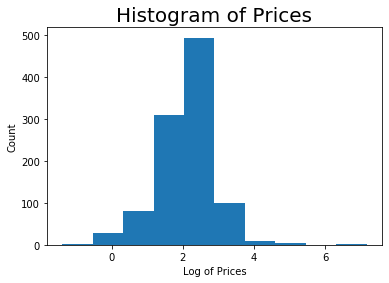

In [156]:
import seaborn as sns
log_prices = np.log(df.price[df.price > 0]).dropna()
log_prices.plot.hist()
plt.xlabel('Log of Prices')
plt.ylabel('Count')
plt.title('Histogram of Prices', fontsize=20)

In [178]:
df.groupby(['country', 'form']).count()

title  rating  price  sponsored
country              form                                                  
Australia            Audible Audiobook          1       0      1          1
                     Diary                      1       1      1          1
                     Hardcover                  5       4      4          5
                     Kindle                    67      51     67         67
                     Kindle Edition            13       2     13         13
                     Paperback                 71      20     63         71
                     Prime Video                2       0      0          2
Canada               Audible Audiobook          1       0      1          1
                     Diary                      1       1      1          1
                     Flexibound                 1       1      1          1
                     Hardcover                 16      14     16         16
                     Kindle Edition            35      27     35         35
                     Paperback                125      55    125        125
                     Prime Video                2       0      0          2
India                Diary                      1       1      0          1
                     Hardcover                 15      11      9         15
                     Kindle Edition           184      84    184        184
                     Mass Market Paperback      2       2      0          2
                     Paperback                121      81     59        121
Singapore            Audio CD                   1       1      1          1
                     Hardcover                 12       7      8         12
                     Imitation Leather          1       1      0          1
                     MP3 CD                     6       6      4          6
                     Mass Market Paperback      1       1      1          1
                     Paperback                 68      27     54         68
                     Spiral-bound               1       1      0          1
United Arab Emirates Hardcover                  5       0      5          5
                     Paperback                153       0    153        153
United Kingdom       App                        1       1      0          1
                     Audible Audiobooks         1       0      1          1
                     Hardcover                  4       2      2          4
                     Kindle & comiXology        1       1      1          1
                     Kindle Edition           102      97    102        102
                     MP3 Download               1       0      0          1
                     Paperback                  3       3      1          3
                     Prime Video                1       0      1          1
United States        App                        4       4      1          4
                     Audible Audiobook         24      23     24         24
                     Board book                 1       1      1          1
                     Hardcover                 31      27     29         31
                     Imitation Leather          1       0      1          1
                     Kindle                    84      69     84         84
                     Kindle & comiXology        1       1      1          1
                     Kindle Edition            64      46     64         64
                     MP3 Music                  4       3      0          4
                     Office Product             1       1      1          1
                     Paperback                150     135    147        150
                     Prime Video                3       1      1          3
                     Spiral-bound               2       2      2          2
                     VHS Tape                   1       1      1          1

Text(0.5, 1.0, 'Budget vs Income')

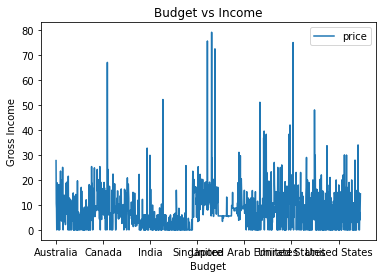

In [209]:
#df.plot.scatter(x='budget', y='gross')
df[df.price < 100].plot(kind='line',x='country', y='price')
plt.xlabel('Budget')
plt.ylabel('Gross Income')
plt.title('Budget vs Income')

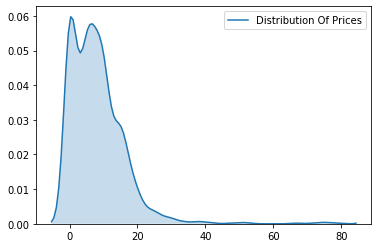

In [213]:
import seaborn as sns
sns.kdeplot(df.price[df.price < 100], shade=True, label='Distribution Of Prices')

In [185]:
df.groupby(['country']).count()['sponsored']

country
Australia               160
Canada                  182
India                   323
Singapore                91
United Arab Emirates    160
United Kingdom          160
United States           381
Name: sponsored, dtype: int64

In [201]:
df.groupby(['country']).mean()['price']

country
Australia                8.468792
Canada                  10.023667
India                    3.094603
Singapore               15.208986
United Arab Emirates    10.018500
United Kingdom          21.196967
United States            8.930272
Name: price, dtype: float64

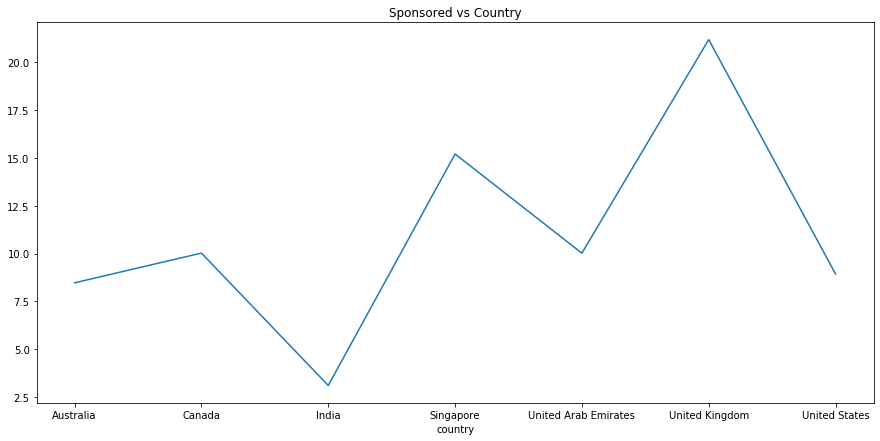

In [202]:
_, ax = plt.subplots(figsize=(15,7))
ax.set_title('Prices vs Country')
df.groupby(['country']).mean()['price'].plot(ax=ax)

In [218]:
g = sns.FacetGrid(data=df, col='color', hue='color', palette='Set1', size=6)
g.map(sns.distplot, 'price')

C:\Users\TRW\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyError: 'color'

# NLP

## Preprocessing

In [64]:
df['title']

0       The Neighborhood Project: Using Evolution to I...
1       Tell Me What You Want: The Science of Sexual D...
2       Sex Up Your Life: The Mind-Blowing Path to Tru...
3       My-Shield Against Parkinson's Disease: How My-...
4       Let My People Go Surfing: The Education of a R...
5       The Book of Moods: How I Turned My Worst Emoti...
6       My Horoscope Planner and Journal for 2019 - Ca...
7       My Horoscope Planner and Journal for 2019 - Ar...
8       My Horoscope, Planner and Journal for 2019: A ...
9       Adult Children of Emotionally Immature Parents...
10      My Horoscope, Planner and Journal for 2019 - C...
11      My Horoscope Planner and Journal for 2019 - Vi...
12                                      I IMPROVE MY LIFE
13                                         Amy & Isabelle
14      My Four-Week Prayer Journal and Study Guide: T...
15            24 Qualities That Helped Me Improve My Life
16                                    Colombia In My Arms
17            

In [65]:
# Convert all the string to lower cases
titles = df.copy()
titles['title'] = titles['title'].str.lower()
titles['title']

0       the neighborhood project: using evolution to i...
1       tell me what you want: the science of sexual d...
2       sex up your life: the mind-blowing path to tru...
3       my-shield against parkinson's disease: how my-...
4       let my people go surfing: the education of a r...
5       the book of moods: how i turned my worst emoti...
6       my horoscope planner and journal for 2019 - ca...
7       my horoscope planner and journal for 2019 - ar...
8       my horoscope, planner and journal for 2019: a ...
9       adult children of emotionally immature parents...
10      my horoscope, planner and journal for 2019 - c...
11      my horoscope planner and journal for 2019 - vi...
12                                      i improve my life
13                                         amy & isabelle
14      my four-week prayer journal and study guide: t...
15            24 qualities that helped me improve my life
16                                    colombia in my arms
17            

In [66]:
import re
# \S+ means anything that is not an empty space
#titles['title'] = titles['title'].apply(lambda x: re.sub('http\S*', '', x))
#titles['title']

In [67]:
# remove numbers
titles['title'] = titles['title'].apply(lambda x: re.sub('\d+', ' ', x))
titles['title']                 

0       the neighborhood project: using evolution to i...
1       tell me what you want: the science of sexual d...
2       sex up your life: the mind-blowing path to tru...
3       my-shield against parkinson's disease: how my-...
4       let my people go surfing: the education of a r...
5       the book of moods: how i turned my worst emoti...
6       my horoscope planner and journal for   - capri...
7       my horoscope planner and journal for   - aries...
8       my horoscope, planner and journal for  : a fun...
9       adult children of emotionally immature parents...
10      my horoscope, planner and journal for   - canc...
11      my horoscope planner and journal for   - virgo...
12                                      i improve my life
13                                         amy & isabelle
14      my four-week prayer journal and study guide: t...
15               qualities that helped me improve my life
16                                    colombia in my arms
17            

In [68]:
# \s+ means all empty space (\n, \r, \t)
titles['title'] = titles['title'].apply(lambda x: re.sub('\s+', ' ', x))
titles['title']

0       the neighborhood project: using evolution to i...
1       tell me what you want: the science of sexual d...
2       sex up your life: the mind-blowing path to tru...
3       my-shield against parkinson's disease: how my-...
4       let my people go surfing: the education of a r...
5       the book of moods: how i turned my worst emoti...
6       my horoscope planner and journal for - caprico...
7       my horoscope planner and journal for - aries: ...
8       my horoscope, planner and journal for : a fun ...
9       adult children of emotionally immature parents...
10      my horoscope, planner and journal for - cancer...
11      my horoscope planner and journal for - virgo: ...
12                                      i improve my life
13                                         amy & isabelle
14      my four-week prayer journal and study guide: t...
15               qualities that helped me improve my life
16                                    colombia in my arms
17            

## Filtering

In [69]:
# remove all punctuation
titles['title'] = titles['title'].apply(lambda x: re.sub('[^\w\s]', '', x))
titles['title']

0       the neighborhood project using evolution to im...
1       tell me what you want the science of sexual de...
2       sex up your life the mindblowing path to true ...
3       myshield against parkinsons disease how myshie...
4       let my people go surfing the education of a re...
5       the book of moods how i turned my worst emotio...
6       my horoscope planner and journal for  capricor...
7       my horoscope planner and journal for  aries a ...
8       my horoscope planner and journal for  a fun wa...
9       adult children of emotionally immature parents...
10      my horoscope planner and journal for  cancer t...
11      my horoscope planner and journal for  virgo a ...
12                                      i improve my life
13                                          amy  isabelle
14      my fourweek prayer journal and study guide to ...
15               qualities that helped me improve my life
16                                    colombia in my arms
17            

In [70]:
# remove unnecessary words
from nltk.corpus import stopwords
stop = stopwords.words('english')
titles['title'] = titles['title'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))
titles['title']

0       neighborhood project using evolution improve c...
1       tell want science sexual desire help improve s...
2       sex life mindblowing path true intimacy healin...
3       myshield parkinsons disease myshield therapy h...
4       let people go surfing education reluctant busi...
5              book moods turned worst emotions best life
6       horoscope planner journal capricorn place plan...
7       horoscope planner journal aries way plan impro...
8       horoscope planner journal fun way improve life...
9       adult children emotionally immature parents he...
10      horoscope planner journal cancer plan document...
11      horoscope planner journal virgo planperweek pr...
12                                           improve life
13                                           amy isabelle
14      fourweek prayer journal study guide help impro...
15                          qualities helped improve life
16                                          colombia arms
17            

## Tokenization

In [71]:
from textblob import TextBlob
titles['title'] = titles['title'].apply(lambda x: TextBlob(x).words)
titles['title']

0       [neighborhood, project, using, evolution, impr...
1       [tell, want, science, sexual, desire, help, im...
2       [sex, life, mindblowing, path, true, intimacy,...
3       [myshield, parkinsons, disease, myshield, ther...
4       [let, people, go, surfing, education, reluctan...
5       [book, moods, turned, worst, emotions, best, l...
6       [horoscope, planner, journal, capricorn, place...
7       [horoscope, planner, journal, aries, way, plan...
8       [horoscope, planner, journal, fun, way, improv...
9       [adult, children, emotionally, immature, paren...
10      [horoscope, planner, journal, cancer, plan, do...
11      [horoscope, planner, journal, virgo, planperwe...
12                                        [improve, life]
13                                        [amy, isabelle]
14      [fourweek, prayer, journal, study, guide, help...
15                     [qualities, helped, improve, life]
16                                       [colombia, arms]
17            

In [72]:
#titles

## Lemmatization

In [74]:
from nltk import WordNetLemmatizer

lemztr = WordNetLemmatizer()
titles['title'] = titles['title'].apply(lambda x: ' '.join([lemztr.lemmatize(word) for word in x]))
titles['title']


0       neighborhood project using evolution improve c...
1       tell want science sexual desire help improve s...
2       sex life mindblowing path true intimacy healin...
3       myshield parkinson disease myshield therapy he...
4       let people go surfing education reluctant busi...
5                book mood turned worst emotion best life
6       horoscope planner journal capricorn place plan...
7       horoscope planner journal aries way plan impro...
8       horoscope planner journal fun way improve life...
9       adult child emotionally immature parent heal d...
10      horoscope planner journal cancer plan document...
11      horoscope planner journal virgo planperweek pr...
12                                           improve life
13                                           amy isabelle
14      fourweek prayer journal study guide help impro...
15                            quality helped improve life
16                                           colombia arm
17            

In [75]:
# from nltk.stem import PorterStemmer

# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()

# titles['title'] = titles['title'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x]))
# titles['title']




In [76]:
titles

country                                              title  \
0                Australia  neighborhood project using evolution improve c...   
1                Australia  tell want science sexual desire help improve s...   
2                Australia  sex life mindblowing path true intimacy healin...   
3                Australia  myshield parkinson disease myshield therapy he...   
4                Australia  let people go surfing education reluctant busi...   
5                Australia           book mood turned worst emotion best life   
6                Australia  horoscope planner journal capricorn place plan...   
7                Australia  horoscope planner journal aries way plan impro...   
8                Australia  horoscope planner journal fun way improve life...   
9                Australia  adult child emotionally immature parent heal d...   
10               Australia  horoscope planner journal cancer plan document...   
11               Australia  horoscope planner journal virgo planperweek pr...   
12               Australia                                       improve life   
13               Australia                                       amy isabelle   
14               Australia  fourweek prayer journal study guide help impro...   
15               Australia                        quality helped improve life   
16               Australia                                       colombia arm   
17               Australia                    shining year life goal workbook   
18               Australia   radiant powerful ditch battle body energize life   
19               Australia  best self official companion new york time bes...   
20               Australia  chimp paradox acclaimed mind management progra...   
21               Australia        heal simple way improve health modern world   
22               Australia  neuroscience mindfulness astonishing science b...   
23               Australia  find mission life happiness love peace improve...   
24               Australia                                          sex dummy   
25               Australia                                  life field manual   
26               Australia                      ant guide improve change life   
27               Australia  disarming narcissist surviving thriving selfab...   
28               Australia  unlimited memory use advanced learning strateg...   
29               Australia                          active baby healthy brain   
30               Australia  love respect love desire respect desperately need   
31               Australia     renew mind rewire brain happier healthier life   
32               Australia  improve life inspirational quote notebook thin...   
33               Australia  open activate masculine power arouse woman lov...   
34               Australia  improve life inspirational quote notebook thin...   
35               Australia  personal guidebook notebook workbook understan...   
36               Australia  life experience philosophy social aspect beami...   
37               Australia                               complete golf manual   
38               Australia  thanks feedback think story accepting criticis...   
39               Australia                            community leader mzansi   
40               Australia  year transforming life motivational notebook j...   
41               Australia  straight honest unfiltered asrealasicanputit a...   
42               Australia  pain paradise story god transformed life marri...   
43               Australia              one small step change life kaizen way   
44               Australia                                   best self better   
45               Australia  better best valuable guide knowing understandi...   
46               Australia  love respect workbook love desire respect desp...   
47               Australia  prayer journal everyone prayer journal feel be...   
48               Australia             life boy ja

## N-Grams

In [77]:
# TextBlob(titles['title']).ngrams(2)

## Word Cloud

In [78]:
titles[titles.country == "Australia"].title
titles[titles.country == "Canada"].title
titles[titles.country == "India"].title
titles[titles.country == "Singapore"].title
titles[titles.country == "United Arab Emirates"].title
titles[titles.country == "United Kingdom"].title
titles[titles.country == "United States"].title

1076             book mood turned worst emotion best life
1077    sex life mindblowing path true intimacy healin...
1078                           blowing cover life cia spy
1079    loving actual life experiment relishing whats ...
1080    want change life overcome anxiety depression a...
1081    life experiment one man humble quest improve l...
1082                             worst day life ever best
1083    stay emergency room master health find joy lif...
1084    fail almost everything still win big kind stor...
1085    talk dirty ultimate guide improve couple sex l...
1086    favor king god purpose passion process great t...
1087            utmost highest updated language hardcover
1088           think better thought training mind success
1089                                            human pet
1090                               shakespeare saved life
1091    wellness project learned right body without gi...
1092    mindfulness meditation everyday life practical...
1093          

In [116]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=5000, width=800, height=400, collocations=False)
# generate word cloud


In [117]:
# AUSTRALIA
wc.generate(' '.join(titles[titles.country == "Australia"].title))

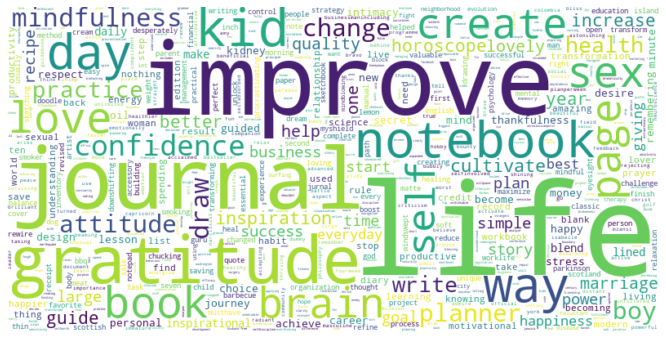

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [119]:
# CANADA

In [120]:
wc.generate(' '.join(titles[titles.country == "Canada"].title))

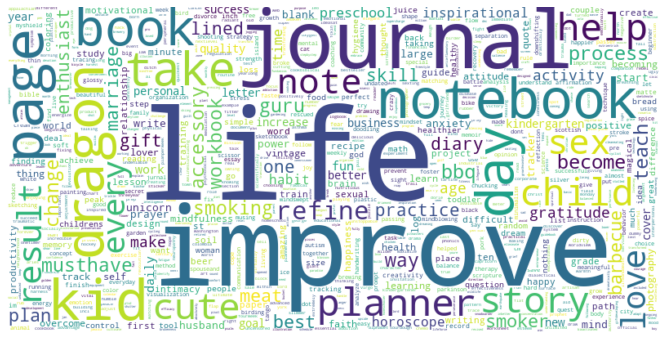

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [122]:
# INDIA

In [123]:
wc.generate(' '.join(titles[titles.country == "India"].title))

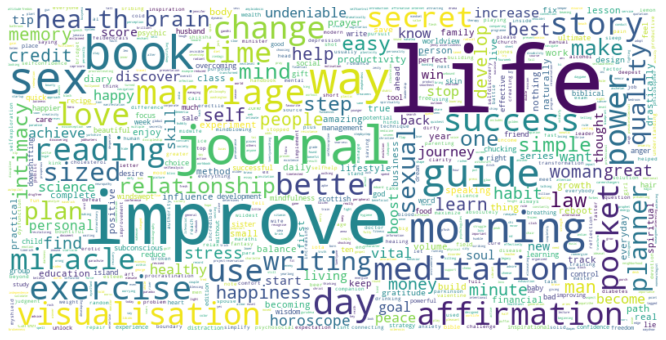

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [125]:
# SINGAPORE

In [126]:
wc.generate(' '.join(titles[titles.country == "Singapore"].title))

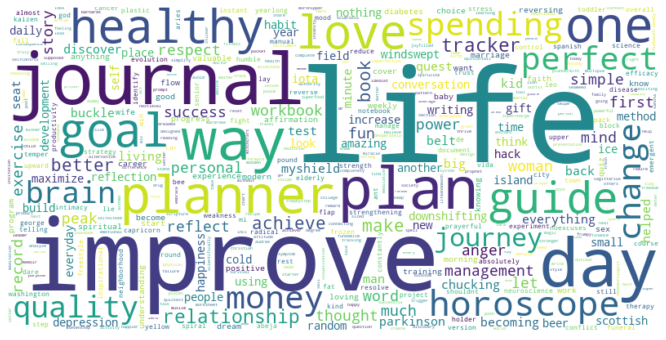

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [128]:
# UNITED ARAB EMIRATES

In [129]:
wc.generate(' '.join(titles[titles.country == "United Arab Emirates"].title))

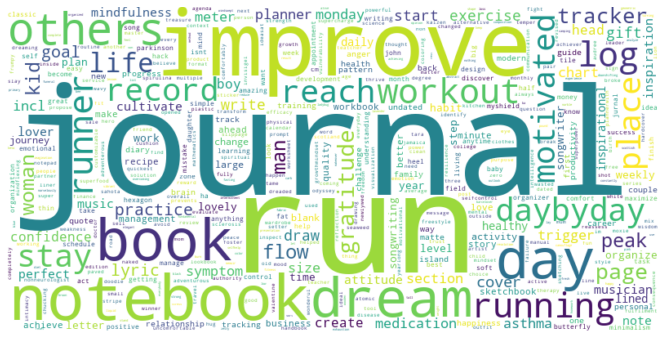

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [131]:
# UNITED KINGDOM

In [132]:
wc.generate(' '.join(titles[titles.country == "United Kingdom"].title))

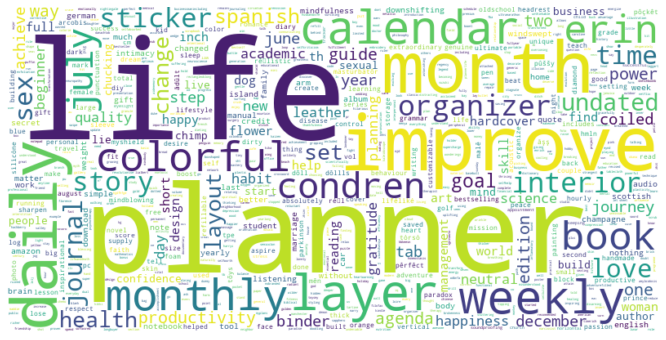

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [134]:
# UNITED STATES

In [135]:
wc.generate(' '.join(titles[titles.country == "United States"].title))

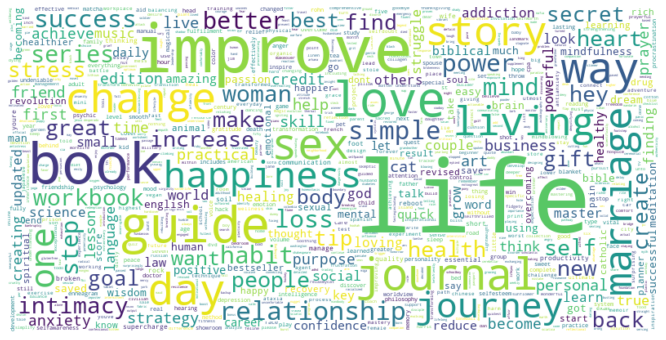

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [137]:
# Total

In [138]:
wc.generate(' '.join(titles.title))

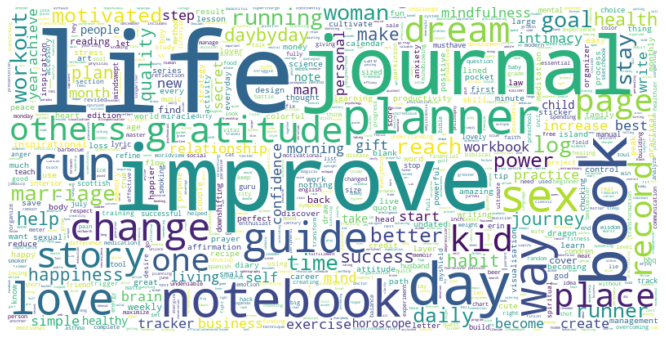

In [139]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sentiment Analysis

In [107]:
# titles.sample

In [140]:
sample_size = 1000

def sentiment_func(x):
    sentiment = TextBlob(x['title'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = titles.sample(sample_size).apply(sentiment_func, axis=1)

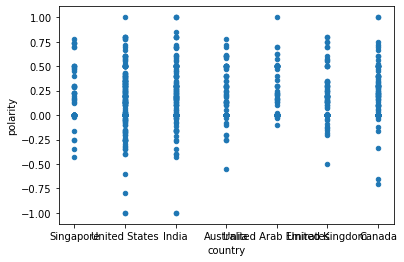

In [141]:
sample.plot.scatter('country', 'polarity')